In [350]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [351]:
#load training data
house_data_train = pd.read_csv("Downloads/boston-housing/train.csv")

In [352]:
#check the size of training data
len(house_data_train)

333

In [353]:
#checking training data info
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [315]:
#checking for null values 
sum(house_data_train.isna().any())

0

In [316]:
#a sample view of training data
house_data_train.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [354]:
#description of data
house_data_train.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [355]:
#correlation matrix
corr = house_data_train.corr()
corr

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,1.000000,0.456312,-0.155639,0.421978,0.007958,0.440185,-0.112790,0.257300,-0.356461,0.707526,0.686246,0.309838,-0.271619,0.281953,-0.221694
crim,0.456312,1.000000,-0.210913,0.422228,-0.041195,0.463001,-0.310180,0.379034,-0.397067,0.666636,0.617081,0.313409,-0.475796,0.532077,-0.407454
zn,-0.155639,-0.210913,1.000000,-0.518679,-0.024442,-0.501990,0.328197,-0.544513,0.637142,-0.303663,-0.311180,-0.380449,0.168130,-0.388112,0.344842
indus,0.421978,0.422228,-0.518679,1.000000,0.037496,0.750087,-0.440365,0.638378,-0.702327,0.569779,0.708313,0.391087,-0.335049,0.614155,-0.473932
chas,0.007958,-0.041195,-0.024442,0.037496,1.000000,0.080275,0.112251,0.068286,-0.081834,0.007714,-0.021826,-0.125067,0.062029,-0.050055,0.204390
nox,0.440185,0.463001,-0.501990,0.750087,0.080275,1.000000,-0.338515,0.736000,-0.769364,0.612180,0.670722,0.192513,-0.369416,0.598874,-0.413054
rm,-0.112790,-0.310180,0.328197,-0.440365,0.112251,-0.338515,1.000000,-0.248573,0.269191,-0.272783,-0.356987,-0.366927,0.155202,-0.615747,0.689598
age,0.257300,0.379034,-0.544513,0.638378,0.068286,0.736000,-0.248573,1.000000,-0.764208,0.447380,0.511893,0.259293,-0.268054,0.588834,-0.358888
dis,-0.356461,-0.397067,0.637142,-0.702327,-0.081834,-0.769364,0.269191,-0.764208,1.000000,-0.477610,-0.529539,-0.231101,0.284374,-0.505939,0.249422
rad,0.707526,0.666636,-0.303663,0.569779,0.007714,0.612180,-0.272783,0.447380,-0.477610,1.000000,0.903562,0.470849,-0.406405,0.484568,-0.352251


<Axes: >

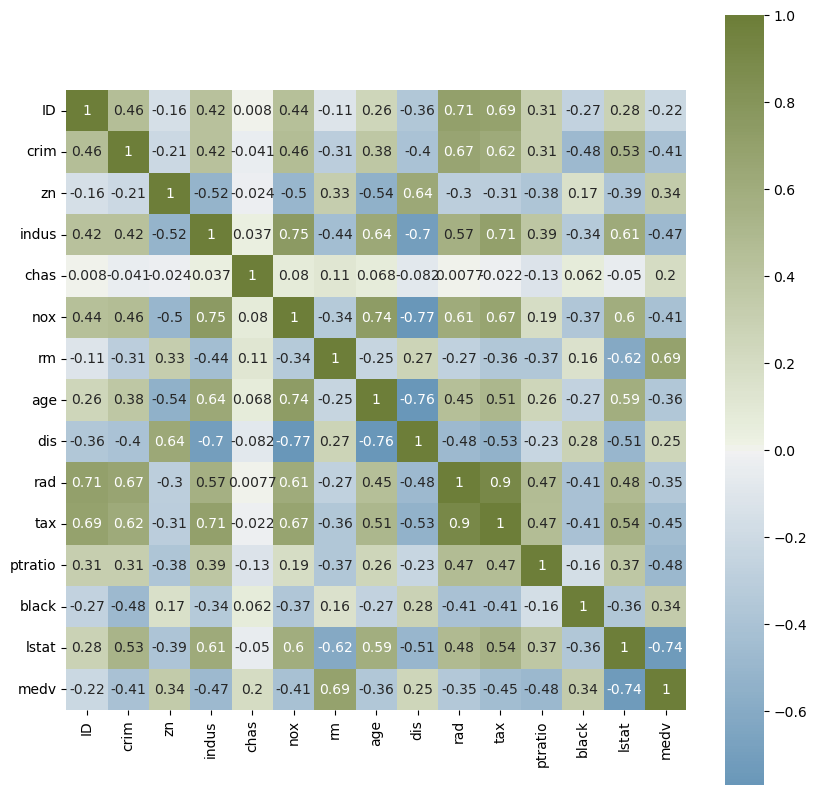

In [357]:
#heat map for better visualization of correlation matrix
plt.figure(figsize = (10,10))
corr_hmap = sns.diverging_palette(600,100,as_cmap=True)
sns.heatmap(corr,cmap=corr_hmap,center=0,square=True,annot=True)

In [358]:
#selecting columns with high correlation
cols = [corr.index[i] for i in range(len(corr.index)) if np.abs(corr.iloc[:,-1].iloc[i])>0.4]
cols

['crim', 'indus', 'nox', 'rm', 'tax', 'ptratio', 'lstat', 'medv']

In [359]:
house_data_train = house_data_train[cols]
house_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     333 non-null    float64
 1   indus    333 non-null    float64
 2   nox      333 non-null    float64
 3   rm       333 non-null    float64
 4   tax      333 non-null    int64  
 5   ptratio  333 non-null    float64
 6   lstat    333 non-null    float64
 7   medv     333 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 20.9 KB


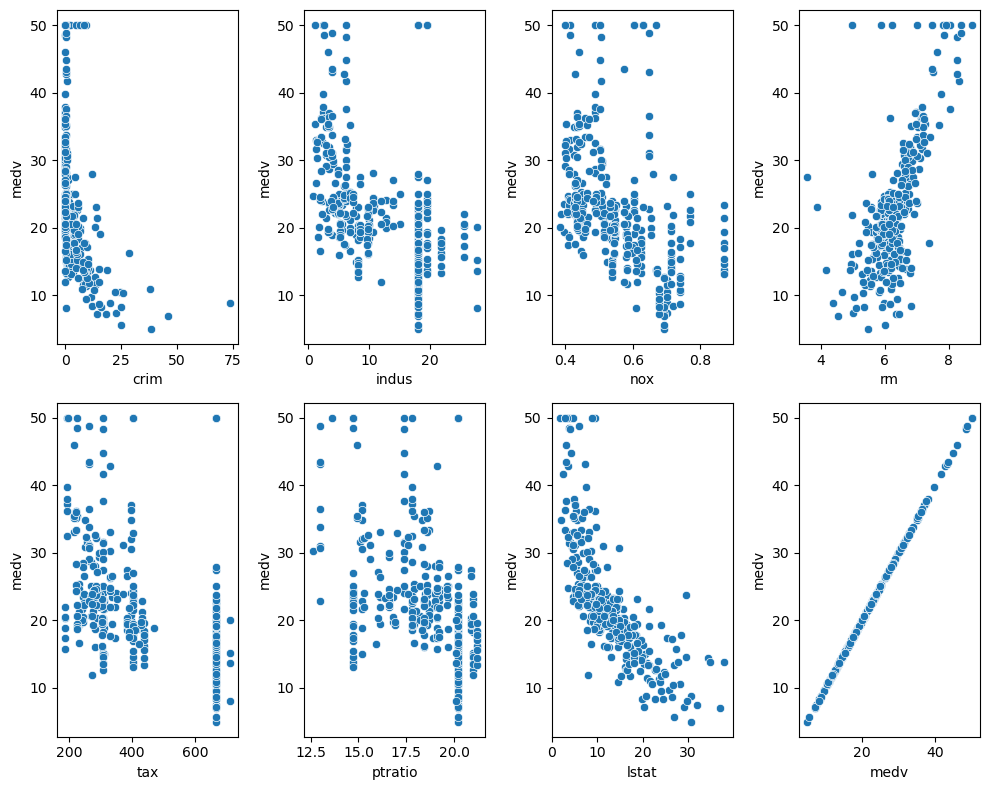

In [360]:
#visualize data with scatterplot
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(10,8))
axes = axes.flatten()
j = 0
for i in house_data_train.columns:
    sns.scatterplot(data=house_data_train,x=i,y='medv',ax=axes[j])
    
    j+=1
plt.tight_layout()

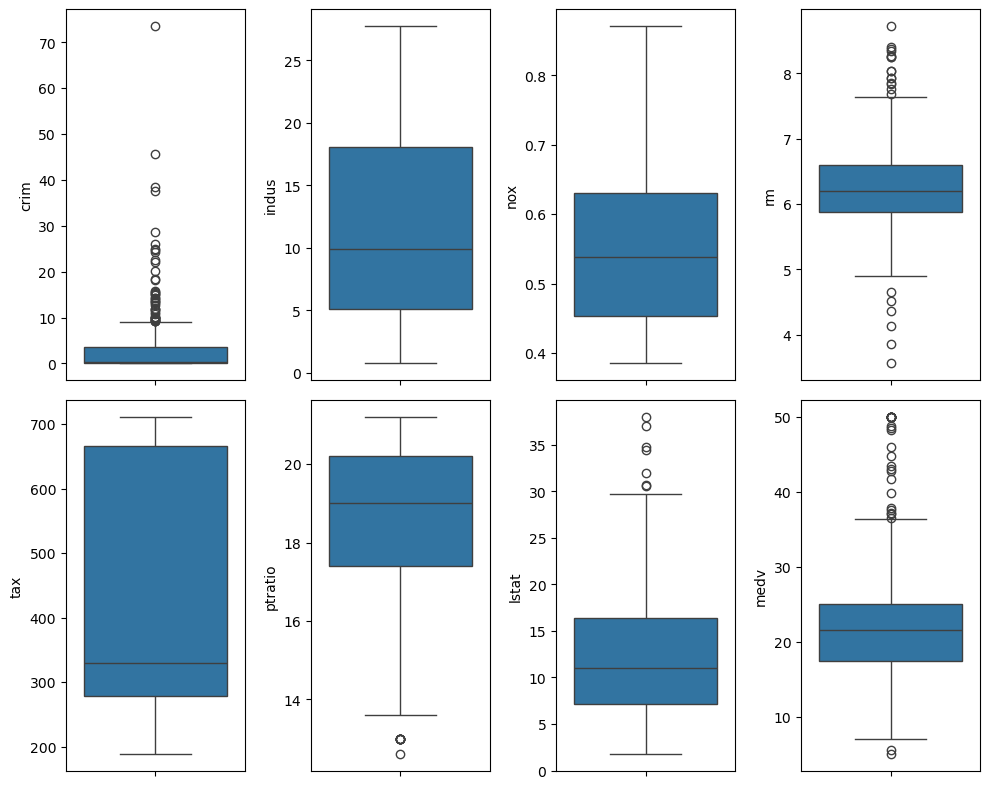

In [361]:
#visualize data with boxplot to identify outliers
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(10,8))
axes = axes.flatten()
j = 0
for i in house_data_train.columns:
    sns.boxplot(data=house_data_train,y=house_data_train[i],ax=axes[j])
    i
    j+=1
plt.tight_layout()

In [362]:
#dealing with the outliers by dropping the outliers
house_data_train = house_data_train[(house_data_train['crim']<=10)]
house_data_train = house_data_train[(house_data_train['medv']<=35)]
house_data_train = house_data_train[(house_data_train['rm']<=7.5)&(house_data_train['rm']>=5)]

In [363]:
len(house_data_train)

262

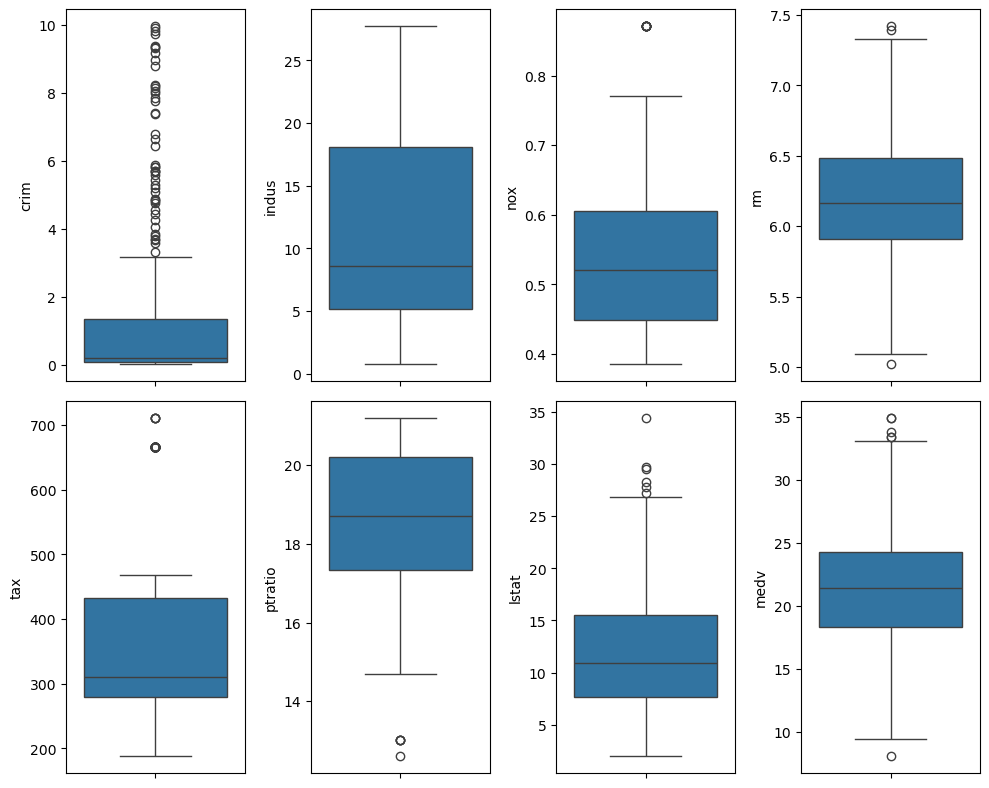

In [364]:
fig,axes = plt.subplots(nrows=2,ncols=4,figsize=(10,8))
axes = axes.flatten()
j = 0
for i in house_data_train.columns:
    sns.boxplot(data=house_data_train,y=house_data_train[i],ax=axes[j])
    i
    j+=1
plt.tight_layout()

In [365]:
#standardizing data to deal with skewed data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(house_data_train)
scaled_data = pd.DataFrame(scaled_data,index=house_data_train.index,columns=house_data_train.columns)
house_data_train = scaled_data

In [366]:
#split data into X and Y
X,Y = house_data_train.iloc[:,:-1],house_data_train.iloc[:,-1]

In [367]:
X

,crim,indus,nox,rm,tax,ptratio,lstat
0,-0.580882,-1.247603,-0.066312,0.805385,-0.592877,-1.531201,-1.232346
1,-0.572674,-0.559260,-0.672954,0.458701,-0.942684,-0.324007,-0.513199
2,-0.570696,-1.266402,-0.769665,1.757638,-1.072242,0.110583,-1.585004
4,-0.548830,-0.443572,-0.189399,-0.462035,-0.495708,-1.579489,0.055550
5,-0.495418,-0.443572,-0.189399,0.359649,-0.495708,-1.579489,1.441982
...,...,...,...,...,...,...,...
328,-0.513819,-0.180382,0.346908,-1.459312,0.022524,0.352022,0.517118
329,-0.558864,0.143545,0.241405,0.845906,-0.741869,1.221201,-0.421576
330,-0.565652,0.143545,0.241405,-0.218907,-0.741869,1.221201,-0.523571
331,-0.559595,0.143545,0.241405,1.708112,-0.741869,1.221201,-1.118250


In [371]:
#split data into training set and cross validation set
X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,test_size=0.25,random_state=40)

In [372]:
#creating a linear regression model to predict Y
model = LinearRegression()

In [373]:
X_train

,crim,indus,nox,rm,tax,ptratio,lstat
27,-0.516325,-0.582397,-0.857584,-1.204928,-1.000985,-0.275719,-0.328226
103,0.257009,1.249811,2.861394,-1.144146,0.100259,-1.820928,0.636399
194,-0.569660,-0.865833,-1.182884,1.449225,-0.923250,0.352022,-1.517584
251,3.008911,1.035788,1.357978,-1.533602,1.803949,0.834899,1.986529
144,-0.493541,-0.050233,-0.497115,0.244838,-0.715957,0.062295,-0.196843
...,...,...,...,...,...,...,...
120,-0.550324,-0.995982,-0.312485,-0.806467,-0.592877,-0.903460,-0.426763
225,-0.559302,-0.831126,-0.268526,-0.561088,-1.059287,0.834899,-0.487268
195,-0.569218,-0.865833,-1.182884,0.929200,-0.923250,0.352022,-1.280750
8,-0.337107,-0.404527,-0.066312,-0.603860,-0.521620,1.221201,-0.665326


In [374]:
#fitting the training data
model.fit(X_train,Y_train)

LinearRegression()

In [375]:
#model parameters
print("intercept-b:  "+str(model.intercept_))
print("weight matrix-w:  "+str(model.coef_))

intercept-b:  0.0302024443420271
weight matrix-w:  [-0.03504156  0.00900474 -0.11262359  0.41149575 -0.07406402 -0.21859242
 -0.29429363]


In [376]:
#model evaluation
#training error
Y_train_pred = model.predict(X_train)
train_error = mse(Y_train,Y_train_pred)
train_error

0.2943382120171054

In [377]:
#validation error
Y_cv_pred = model.predict(X_cv)
validation_error = mse(Y_cv,Y_cv_pred)
validation_error

0.27953675741231326

In [378]:
#loading test data
house_data_test = pd.read_csv('Downloads/boston-housing/test.csv')
X_test = house_data_test[cols[:-1]]
X_test

,crim,indus,nox,rm,tax,ptratio,lstat
0,0.02729,7.07,0.469,7.185,242,17.8,4.03
1,0.02985,2.18,0.458,6.430,222,18.7,5.21
2,0.14455,7.87,0.524,6.172,311,15.2,19.15
3,0.21124,7.87,0.524,5.631,311,15.2,29.93
4,0.17004,7.87,0.524,6.004,311,15.2,17.10
...,...,...,...,...,...,...,...
168,0.17899,9.69,0.585,5.670,391,19.2,17.60
169,0.28960,9.69,0.585,5.390,391,19.2,21.14
170,0.23912,9.69,0.585,6.019,391,19.2,12.92
171,0.22438,9.69,0.585,6.027,391,19.2,14.33


In [379]:
#making predictions on test  data
Y_test_pred = model.predict(X_test)

In [380]:
Y_test_pred

array([-20.00375488, -19.42003747, -29.41549621, -32.81293763,
       -28.88221877, -29.16509276, -28.27361432, -29.67076078,
       -29.86946211, -29.2751938 , -28.4065655 , -28.09962763,
       -33.04029922, -30.37989405, -25.24277096, -25.79092237,
       -25.00967752, -19.77077161, -27.98216807, -20.51486166,
       -25.59314489, -24.64291745, -29.81436462, -27.16572827,
       -34.53776144, -33.73252606, -24.32494669, -23.66134989,
       -23.61434404, -23.60539397, -22.29307525, -22.20582455,
       -23.14265313, -34.05628414, -35.40444782, -34.24082922,
       -38.16951217, -38.35829598, -38.03259135, -19.80460896,
       -39.95172059, -37.90567302, -37.51426713, -39.24703646,
       -41.42284949, -38.62144636, -39.6523913 , -35.61229533,
       -34.68961793, -34.49658739, -34.96532889, -31.45939924,
       -30.34154241, -33.66975755, -19.99902098, -19.52805381,
       -31.43674284, -19.68124522, -25.32649104, -26.07926115,
       -31.96465462, -26.77037733, -27.45515575, -29.12